In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [47]:
dems = pd.read_csv('data/fivethirtyeight/dem_candidates.csv')
reps = pd.read_csv('data/fivethirtyeight/rep_candidates.csv', encoding = 'ISO-8859-1')
dems = dems[dems['Office'] == 'Representative']
reps = reps[reps['Office'] == 'Representative']

In [48]:
dems['District'] = dems['District'].replace('At-Large', '1')
reps['District'] = reps['District'].replace('At-Large', '1')

dems['Fullname'] = dems['State'] + dems['District']
reps['Fullname'] = reps['State'] + reps['District']

In [49]:
districts = pd.read_csv('data/districts.csv')

def make_list(row):
    return [row.State + str(i) for i in np.arange(1, row['# Districts'] + 1)]

nested = districts.apply(make_list, axis=1)
unnested = sum(nested, [])

In [84]:
demincdists = dems[dems['Incumbent'] == 'Yes']['Fullname'].unique()
demchadists = dems[~dems['Fullname'].isin(demincdists)]['Fullname'].unique()

repincdists = reps[reps['Incumbent'] == 'Yes']['Fullname'].unique()
repchadists = reps[~reps['Fullname'].isin(repincdists)]['Fullname'].unique()

demincs = dems[dems['Fullname'].isin(demincdists)]
demchas = dems[dems['Fullname'].isin(demchadists)]

repincs = reps[reps['Fullname'].isin(repincdists)]
repchas = reps[reps['Fullname'].isin(repchadists)]

deminccounts = demincs[['Fullname', 'Candidate']].groupby('Fullname').count()
demchacounts = demchas[['Fullname', 'Candidate']].groupby('Fullname').count()
deminccounts['Type'] = 'Incumbent'
demchacounts['Type'] = 'Non-incumbent'

demalls = pd.concat([deminccounts, demchacounts]).reset_index()
demalls['Party'] = 'Democratic'

repinccounts = repincs[['Fullname', 'Candidate']].groupby('Fullname').count()
repchacounts = repchas[['Fullname', 'Candidate']].groupby('Fullname').count()
repinccounts['Type'] = 'Incumbent'
repchacounts['Type'] = 'Non-incumbent'

repalls = pd.concat([repinccounts, repchacounts]).reset_index()
repalls['Party'] = 'Republican'

alls = pd.concat([demalls, repalls])
alls = alls.reset_index()
alls

incs = alls[alls['Type'] == 'Incumbent']
chas = alls[alls['Type'] == 'Non-incumbent']

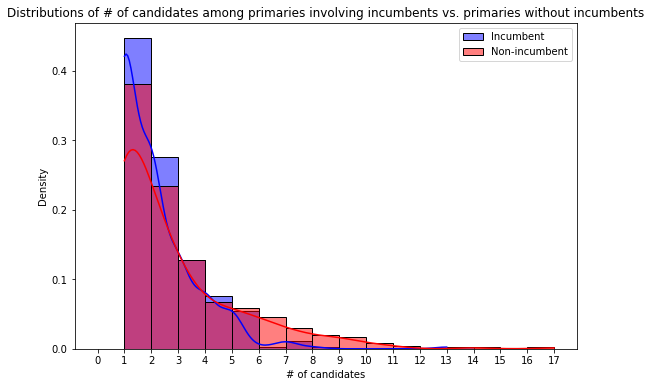

In [85]:
bins = np.arange(0, 18)
ticks = np.arange(0, 18)
plt.figure(figsize=[9, 6])
sns.histplot(incs, x='Candidate', stat='density', bins=bins, palette='tab10', alpha=0.5, kde=True, color='blue', label='Incumbent')
sns.histplot(chas, x='Candidate', stat='density', bins=bins, palette='tab10', alpha=0.5, kde=True, color='red', label='Non-incumbent')
plt.legend()
plt.title('Distributions of # of candidates among primaries involving incumbents vs. primaries without incumbents')
plt.xlabel('# of candidates')
plt.xticks(ticks);

In [99]:
len(incs.Fullname)

369

In [87]:
incs[incs.Fullname == 'Florida2']

,index,Fullname,Candidate,Type,Party
52,52,Florida2,1,Incumbent,Democratic
440,33,Florida2,1,Incumbent,Republican


In [100]:
len(chas.Fullname)

461

In [101]:
369 + 461

830

In [89]:
chas.Fullname.value_counts()

Texas38           2
Illinois3         2
Michigan10        2
Pennsylvania17    2
Maryland4         2
                 ..
Oklahoma5         1
Oklahoma4         1
Oklahoma3         1
Oklahoma1         1
Wisconsin4        1
Name: Fullname, Length: 400, dtype: int64

In [90]:
chas[chas.Fullname == 'North Carolina4']

,index,Fullname,Candidate,Type,Party
320,320,North Carolina4,8,Non-incumbent,Democratic
769,362,North Carolina4,2,Non-incumbent,Republican


In [91]:
(incs.Fullname)

0        Alabama7
1        Arizona2
2        Arizona3
3        Arizona4
4        Arizona7
          ...    
587    Wisconsin5
588    Wisconsin6
589    Wisconsin7
590    Wisconsin8
591      Wyoming1
Name: Fullname, Length: 369, dtype: object

In [92]:
dc1 = pd.DataFrame(chas.Fullname.value_counts()).reset_index()
dc2 = pd.DataFrame(incs.Fullname.value_counts()).reset_index()

In [94]:
dc1.merge(dc2, how='left', on='index')

,index,Fullname_x,Fullname_y
0,Texas38,2,NaN
1,Illinois3,2,NaN
2,Michigan10,2,NaN
3,Pennsylvania17,2,NaN
4,Maryland4,2,NaN
...,...,...,...
395,Oklahoma5,1,1.0
396,Oklahoma4,1,1.0
397,Oklahoma3,1,1.0
398,Oklahoma1,1,1.0


In [95]:
dems[dems.Fullname == 'New York2'][['Incumbent']]

,Incumbent
981,No


In [96]:
reps[reps.Fullname == 'New York2']

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,...,Trump,Trump Date,Club for Growth,Party Committee,Renew America,E-PAC,VIEW PAC,Maggie's List,Winning for Women,Fullname
1513,Andrew R. Garbarino,Male,White,NaN,NaN,Yes,No,New York,8/23/22,Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York2
1514,Robert Cornicelli,Male,White,NaN,NaN,No,Yes,New York,8/23/22,Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York2
1515,Mike Rakebrandt,Male,White,NaN,NaN,No,Yes,New York,8/23/22,Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York2


In [97]:
incs[incs.Fullname == 'New York2']

,index,Fullname,Candidate,Type,Party
504,97,New York2,3,Incumbent,Republican


In [98]:
chas[chas.Fullname == 'New York2']

,index,Fullname,Candidate,Type,Party
307,307,New York2,1,Non-incumbent,Democratic
